<a href="https://colab.research.google.com/github/sanjaykolipaka/AIML-Review/blob/main/AIML(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import glob
import numpy as np
data=[]
y=[]
def path_reading(path,k):
  for file in glob.glob(path):
    image_read = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    images=cv2.resize(image_read,(100,100))
    data.append(images)
    y.append(k)
img_path="/content/drive/MyDrive/Car-Bike-Dataset/Bike/*.*"
path_reading(img_path,1)

img_path="/content/drive/MyDrive/Car-Bike-Dataset/Car/*.*"
path_reading(img_path,0)
'''
#img_path="/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Severe/*.*"
#path_reading(img_path,1)

img_path="/content/drive/MyDrive/gaussian_filtered_images/gaussian_filtered_images/Moderate/*.*"
path_reading(img_path,1)'''

data=np.array(data)
y=np.array(y)

print(data,y)

[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 254 254 254]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 254 ... 255 255 255]
  [255 255 254 ... 255 255 255]]

 [[204  36  22 ...   2   2   2]
  [222  70  51 ...   2   2   0]
  [112 168  45 ...   2   2   7]
  ...
  [ 26  26  26 ...   9  14   0]
  [ 71  62  53 ...   7   5   3]
  [ 92  94  96 ...  42  34  25]]

 [[102  75 110 ...  63  73  82]
  [ 84 123  79 ...  63  81  69]
  [101  79 107 ...  60  54 122]
  ...
  [115 115 116 ... 122 120 120]
  [115 115 116 ... 121 119 119]
  [116 114 116 ... 121 120 120]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[105  80 147 ... 173 114 136]
  [113  70 163 ... 158 140 118]
  [ 85  80  91 ... 142 153 131]
  ...
  [191 199 198 ... 208 209 208]
  [183 194 195 ... 208 209 208]
  [190 191 192 ... 212 209 2

In [ ]:
print(data.shape)
print(y.shape)

(4000, 100, 100)
(4000,)


In [ ]:
nsamples, nx, ny = data.shape
x = data.reshape((nsamples,nx*ny))
print(x.shape)

(4000, 10000)


In [ ]:
from sklearn.utils import shuffle
x,y=shuffle(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.25, random_state = 0)

In [ ]:

#normalizing(to transform features to be o a similar scale) the data-standardscaler
# standardscaler it helps converting all numerical values into the one range
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)#normalizing
xtest = sc_x.transform(xtest)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [ ]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred = model.predict(xtest)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Confusion Matrix : 
 [[380 115]
 [144 361]]
Accuracy :  0.741


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       495
           1       0.76      0.71      0.74       505

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(xtrain, ytrain)
pred = knn.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print ("Accuracy : ", accuracy_score(ytest,pred))
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

Accuracy :  0.725
[[371 124]
 [151 354]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       495
           1       0.74      0.70      0.72       505

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.72      1000
weighted avg       0.73      0.72      0.72      1000



**Desicion Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
15
clf_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, random_state=1)

[Text(0.5, 0.9, 'x[8148] <= -0.894\ngini = 0.5\nsamples = 3000\nvalue = [1505, 1495]'),
 Text(0.25, 0.7, 'x[8170] <= -0.809\ngini = 0.36\nsamples = 709\nvalue = [542, 167]'),
 Text(0.125, 0.5, 'x[8166] <= -0.486\ngini = 0.228\nsamples = 351\nvalue = [305, 46]'),
 Text(0.0625, 0.3, 'x[4175] <= -1.288\ngini = 0.159\nsamples = 321\nvalue = [293, 28]'),
 Text(0.03125, 0.1, 'gini = 0.449\nsamples = 47\nvalue = [31, 16]'),
 Text(0.09375, 0.1, 'gini = 0.084\nsamples = 274\nvalue = [262, 12]'),
 Text(0.1875, 0.3, 'x[8567] <= -0.648\ngini = 0.48\nsamples = 30\nvalue = [12, 18]'),
 Text(0.15625, 0.1, 'gini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.375, 0.5, 'x[9190] <= -0.856\ngini = 0.448\nsamples = 358\nvalue = [237, 121]'),
 Text(0.3125, 0.3, 'x[5166] <= 0.122\ngini = 0.454\nsamples = 86\nvalue = [30, 56]'),
 Text(0.28125, 0.1, 'gini = 0.293\nsamples = 56\nvalue = [10, 46]'),
 Text(0.34375, 0.1, 'gini = 0.444\nsamples = 

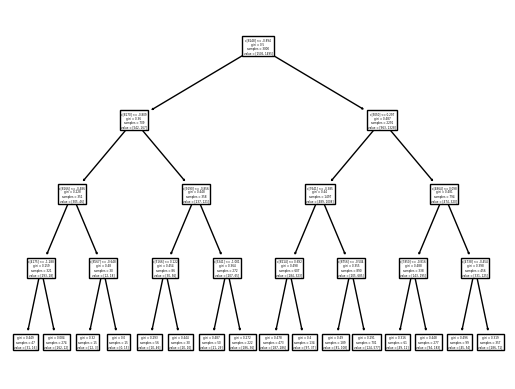

In [ ]:
from sklearn import tree
tree.plot_tree(clf_tree)

In [ ]:
pre=clf_tree.predict(xtest)

In [ ]:
pre

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
print ("Accuracy : ", accuracy_score(ytest,pre))
print(confusion_matrix(ytest, pre))
print(classification_report(ytest, pre))

Accuracy :  0.679
[[273 222]
 [ 99 406]]
              precision    recall  f1-score   support

           0       0.73      0.55      0.63       495
           1       0.65      0.80      0.72       505

    accuracy                           0.68      1000
   macro avg       0.69      0.68      0.67      1000
weighted avg       0.69      0.68      0.67      1000



**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
cl = SVC(kernel='linear', probability=True, random_state=42)
cl.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
p=cl.predict(xtest)

In [ ]:
print ("Accuracy : ", accuracy_score(ytest,p))
print(confusion_matrix(ytest, p))
print(classification_report(ytest, p))

Accuracy :  0.73
[[374 121]
 [149 356]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.73       495
           1       0.75      0.70      0.73       505

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
dn=regressor.predict(xtest)

In [ ]:
dn

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [ ]:
print ("Accuracy : ", accuracy_score(ytest,dn))
print(confusion_matrix(ytest, dn))
print(classification_report(ytest, dn))

Accuracy :  0.803
[[404  91]
 [106 399]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       495
           1       0.81      0.79      0.80       505

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



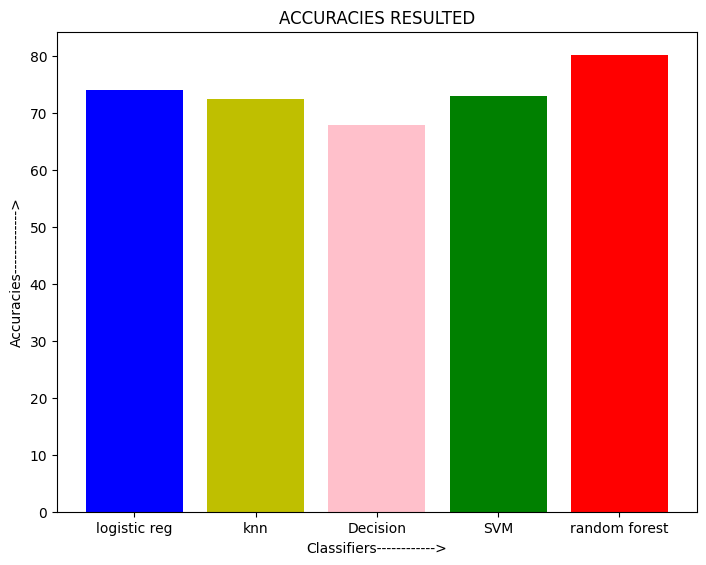

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['logistic reg','knn','Decision','SVM','random forest']

accuracy = [accuracy_score(ytest, y_pred)*100,accuracy_score(ytest,pred)*100,accuracy_score(ytest,pre)*100,accuracy_score(ytest,p)*100,accuracy_score(ytest,dn)*100]

ax.bar(algo[0],accuracy[0],color = 'b')

ax.bar(algo[1],accuracy[1],color = 'y')

ax.bar(algo[2],accuracy[2],color = 'pink')


ax.bar(algo[3],accuracy[3],color = 'green')

ax.bar(algo[4],accuracy[4],color = 'r')

plt.xlabel('Classifiers------------>')

plt.ylabel('Accuracies------------->')

plt.title('ACCURACIES RESULTED')

plt.show()